In [ ]:
### Linear Regression 

In this notebook we are going to create a linear regression model.

First we are going to load the following packages using `pacman`:

1. `tidyverse` - For data wrangling and visualization
2. `caret` - For data splitting and model evaluation
3. `Metrics` - For calculating MSE, MAE, RMSE


In [1]:
pacman::p_load(pacman, tidyverse, caret, Metrics)

Installing package into 'C:/Users/crisp/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'sys', 'ps', 'sass', 'cachem', 'rappdirs', 'askpass', 'processx', 'highr', 'xfun', 'yaml', 'bslib', 'fontawesome', 'jquerylib', 'tinytex', 'backports', 'memoise', 'blob', 'DBI', 'gargle', 'ids', 'rematch2', 'mime', 'openssl', 'systemfonts', 'textshaping', 'callr', 'fs', 'knitr', 'rmarkdown', 'selectr', 'broom', 'conflicted', 'dbplyr', 'dtplyr', 'googledrive', 'googlesheets4', 'httr', 'modelr', 'ragg', 'reprex', 'rstudioapi', 'rvest', 'xml2'


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4/PACKAGES'"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 247928 != reported length 1608387"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https

Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/xml2_1.3.8.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'xml2' failed"


package 'sys' successfully unpacked and MD5 sums checked
package 'ps' successfully unpacked and MD5 sums checked
package 'sass' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'processx' successfully unpacked and MD5 sums checked
package 'highr' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'yaml' successfully unpacked and MD5 sums checked
package 'bslib' successfully unpacked and MD5 sums checked
package 'fontawesome' successfully unpacked and MD5 sums checked
package 'jquerylib' successfully unpacked and MD5 sums checked
package 'tinytex' successfully unpacked and MD5 sums checked
package 'backports' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked 


tidyverse installed

Warning message:
"package 'tidyverse' was built under R version 4.4.3"
Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Warning message:
"package 'tibble' was built under R version 4.4.3"
Warning message:
"package 'tidyr' was built under R version 4.4.3"
Warning message:
"package 'readr' was built under R version 4.4.3"
Warning message:
"package 'purrr' was built under R version 4.4.3"
Warning message:
"package 'dplyr' was built under R version 4.4.3"
Warning message:
"package 'stringr' was built under R version 4.4.3"
Warning message:
"package 'forcats' was built under R version 4.4.3"
Warning message:
"package 'lubridate' was built under R version 4.4.3"
Installing package into 'C:/Users/crisp/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4

package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\crisp\AppData\Local\Temp\Rtmp0k8Lyv\downloaded_packages



Metrics installed

Warning message:
"package 'Metrics' was built under R version 4.4.3"


### Dataset
Next we are going to load the dataset from a csv file into a dataframe

In [3]:
data <- read.csv("insurance.csv", stringsAsFactors=T)
View(head(data))

,age,sex,bmi,children,smoker,region,charges
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


### Check for Missing Values
Before training, we need to ensure data quality by checking for null values.

In [5]:
colSums(is.na(data))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

To remove na values if they exists we do it as follows:

In [8]:
data <- na.omit(data)

In the following code cewll we are going to check the summary of the data.

In [11]:
summary(data)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

#### Visualize the Data
Visualizing helps you understand relationships, spot outliers, and guide feature engineering. Here's a plot of `bmi` vs `charges`, `colored` by `smoker` status.

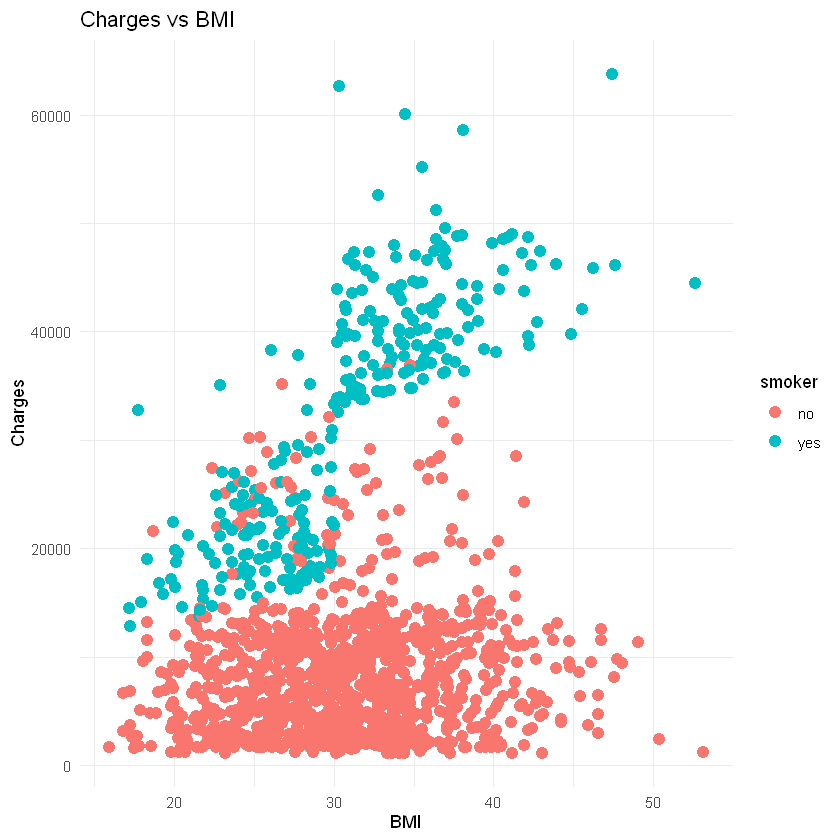

In [13]:
ggplot(data, aes(x = bmi, y = charges, color = smoker)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(title = "Charges vs BMI", x = "BMI", y = "Charges")

###  Split Data into Training and Testing Sets
We split the dataset to train the model on one part and evaluate it on the other.

In [29]:
SEED = 27
set.seed(SEED) 
train_index <- createDataPartition(data$charges, p = 0.8, list = FALSE)
train <- data[train_index, ]
test <- data[-train_index, ]

print(paste("Train Size: ", nrow(train)))
print(paste("Test Size: ", nrow(test)))

[1] "Train Size:  1072"
[1] "Test Size:  266"


### Train the Linear Regression Model
We train a linear regression model on the training data. 

> Note thet categorical variables should be encoded correctly as factors.

In [44]:
model <- lm(charges ~ age + sex + bmi + children + smoker + region, data = train)
summary(model)


Call:
lm(formula = charges ~ age + sex + bmi + children + smoker + 
    region, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-11888  -2808  -1102   1116  29731 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11381.40    1133.68 -10.039  < 2e-16 ***
age                265.13      13.53  19.599  < 2e-16 ***
sexmale             27.24     378.59   0.072 0.942646    
bmi                307.20      32.42   9.477  < 2e-16 ***
children           552.75     152.64   3.621 0.000307 ***
smokeryes        23872.58     478.98  49.841  < 2e-16 ***
regionnorthwest   -339.84     533.05  -0.638 0.523910    
regionsoutheast   -913.62     543.84  -1.680 0.093260 .  
regionsouthwest   -813.36     540.06  -1.506 0.132352    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6170 on 1063 degrees of freedom
Multiple R-squared:  0.7384,	Adjusted R-squared:  0.7364 
F-statistic: 375.1 on 8 and 1063 DF,  p-val

### Visualize the Model Fit
This helps us understand how well our model predictions match actual values (on the training set).

In [57]:
preds <- predict(model, newdata = train)
preds[1]

1 
25286.23

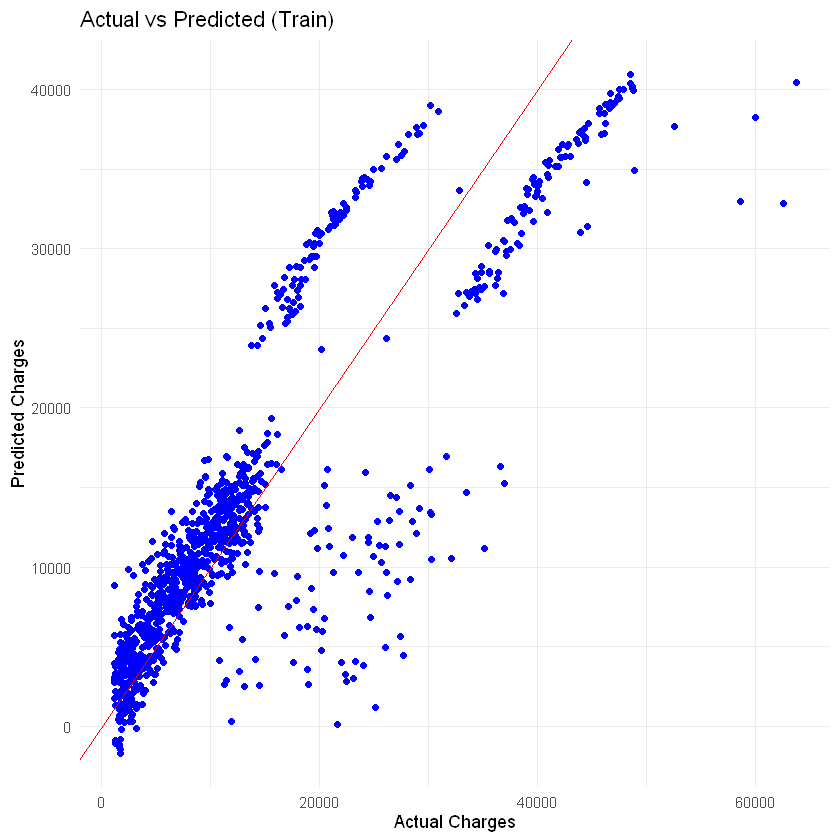

In [59]:
train$predicted = preds

ggplot(train, aes(x = charges, y = predicted)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  theme_minimal() +
  labs(title = "Actual vs Predicted (Train)", x = "Actual Charges", y = "Predicted Charges")

In [61]:
View(tail(train))

,age,sex,bmi,children,smoker,region,charges,predicted
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>
1333,52,female,44.70,3,no,southwest,11411.685,16982.192
1334,50,male,30.97,3,no,northwest,10600.548,12734.809
1335,18,female,31.92,0,no,northeast,2205.981,3196.834
1336,18,female,36.85,0,no,southeast,1629.833,3797.721
1337,21,female,25.80,0,no,southwest,2007.945,1298.790
1338,61,female,29.07,0,yes,northwest,29141.360,37254.647


### Evaluate the Model on Test Data
We use the model to predict `charges` for the test set and compute common regression metrics.

In [64]:
predictions <- predict(model, newdata = test)
mse_val <- mse(test$charges, predictions)
mae_val <- mae(test$charges, predictions)
rmse_val <- rmse(test$charges, predictions)
r2_val <- R2(predictions, test$charges)  # from caret

cat("MSE:", mse_val, "\n")
cat("MAE:", mae_val, "\n")
cat("RMSE:", rmse_val, "\n")
cat("R2 Score:", r2_val, "\n")

MSE: 31854668 
MAE: 4064.828 
RMSE: 5643.994 
R2 Score: 0.7983818 


### Make a Prediction (Inference)
Now we can use the trained model to predict charges for a new individual.

In [67]:
new_person <- data.frame(
  age = 40,
  sex = "male",
  bmi = 30,
  children = 2,
  smoker = "yes",
  region = "southeast"
)

new_person$sex <- as.factor(new_person$sex)
new_person$smoker <- as.factor(new_person$smoker)
new_person$region <- as.factor(new_person$region)

predicted_charge <- predict(model, newdata = new_person)
cat("Predicted Insurance Charge:", predicted_charge, "\n")

Predicted Insurance Charge: 32531.57 


### Improving the model
In this section we are going to use different techniques to improve the model.

#### 1. Polynomial Features
- Polynomial features let the model capture non-linear relationships between predictors and the response.

In [70]:
train$bmi2 <- train$bmi^2
test$bmi2 <- test$bmi^2

model_poly <- lm(charges ~ age + sex + bmi + bmi2 + children + smoker + region, data = train)
summary(model_poly)


Call:
lm(formula = charges ~ age + sex + bmi + bmi2 + children + smoker + 
    region, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-11075  -2952  -1340   1454  29415 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -18173.084   3697.865  -4.914 1.03e-06 ***
age                263.549     13.535  19.472  < 2e-16 ***
sexmale             13.993    378.166   0.037 0.970489    
bmi                761.969    237.928   3.203 0.001403 ** 
bmi2                -7.237      3.751  -1.929 0.053959 .  
children           555.829    152.452   3.646 0.000279 ***
smokeryes        23890.277    478.452  49.932  < 2e-16 ***
regionnorthwest   -411.346    533.655  -0.771 0.440991    
regionsoutheast   -875.823    543.494  -1.611 0.107375    
regionsouthwest   -860.559    539.925  -1.594 0.111267    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6163 on 1062 degrees of freedom
Multiple R-squared:  0.73

In [72]:
predictions <- predict(model_poly, newdata = test)
mse_val <- mse(test$charges, predictions)
mae_val <- mae(test$charges, predictions)
rmse_val <- rmse(test$charges, predictions)
r2_val <- R2(predictions, test$charges)  # from caret

cat("MSE:", mse_val, "\n")
cat("MAE:", mae_val, "\n")
cat("RMSE:", rmse_val, "\n")
cat("R2 Score:", r2_val, "\n")

MSE: 31710954 
MAE: 4136.667 
RMSE: 5631.248 
R2 Score: 0.7992524 


Our model was able to improve the `R2 score` from `0.7983818` to `0.7992524`

#### 2. Interaction Terms
Interaction terms let you model cases where the effect of one variable depends on another.

In [87]:
model_interact <- lm(charges ~ age + sex + bmi * smoker + children + region, data = train)
summary(model_interact)


Call:
lm(formula = charges ~ age + sex + bmi * smoker + children + 
    region, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14598.9  -1979.1  -1473.6   -588.7  30365.0 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1789.713   1008.400  -1.775   0.0762 .  
age                266.966     10.994  24.283  < 2e-16 ***
sexmale           -489.714    308.464  -1.588   0.1127    
bmi                  4.289     29.353   0.146   0.8838    
smokeryes       -20843.320   1950.290 -10.687  < 2e-16 ***
children           547.782    124.048   4.416 1.11e-05 ***
regionnorthwest   -493.224    433.249  -1.138   0.2552    
regionsoutheast  -1020.944    441.990  -2.310   0.0211 *  
regionsouthwest  -1068.299    439.034  -2.433   0.0151 *  
bmi:smokeryes     1456.779     62.259  23.399  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5015 on 1062 degrees of freedom
Multiple R-s

In [89]:
predictions <- predict(model_interact, newdata = test)
mse_val <- mse(test$charges, predictions)
mae_val <- mae(test$charges, predictions)
rmse_val <- rmse(test$charges, predictions)
r2_val <- R2(predictions, test$charges)  # from caret

cat("MSE:", mse_val, "\n")
cat("MAE:", mae_val, "\n")
cat("RMSE:", rmse_val, "\n")
cat("R2 Score:", r2_val, "\n")

MSE: 17025633 
MAE: 2748.109 
RMSE: 4126.213 
R2 Score: 0.8930703 


Our model was able to improve the `R2 score` from `0.7983818` to `0.8930703` this shows that Interaction Terms helped us to improve the model.

#### 3. One-Hot Encoding
In `lm()`, R already handles categorical variables `(factor)` by default using dummy `(one-hot)` encoding.

But if we want full control or to prepare for other ML models, we use `model.matrix()`:

In [124]:
data <- read.csv("insurance.csv", stringsAsFactors=T)

train_index <- createDataPartition(data$charges, p = 0.8, list = FALSE)
train <- data[train_index, ]
test <- data[-train_index, ]

# One-hot encode all factors
train_matrix <- model.matrix(charges ~ ., data = train)[, -1]  # remove intercept
test_matrix <- model.matrix(charges ~ ., data = test)[, -1]

train_df <- as.data.frame(train_matrix)
train_df$charges <- train$charges

test_df <- as.data.frame(test_matrix)
test_df$charges <- test$charges

Next we are going to train the model.

In [127]:
train_df <- as.data.frame(test_df)
model_ohe <- lm(charges ~ ., data = train_df)
summary(model_ohe)


Call:
lm(formula = charges ~ ., data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-16340.9  -2858.5  -1450.1    717.5  25608.2 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4459.96    2486.11  -1.794   0.0740 .  
age               238.09      29.48   8.075 2.61e-14 ***
sexmale           277.22     824.67   0.336   0.7370    
bmi               141.63      71.68   1.976   0.0492 *  
children          598.34     345.26   1.733   0.0843 .  
smokeryes       26790.14    1099.52  24.365  < 2e-16 ***
regionnorthwest -1843.39    1252.72  -1.472   0.1424    
regionsoutheast  -636.67    1232.64  -0.517   0.6059    
regionsouthwest -2226.64    1228.09  -1.813   0.0710 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6657 on 257 degrees of freedom
Multiple R-squared:  0.7457,	Adjusted R-squared:  0.7378 
F-statistic: 94.22 on 8 and 257 DF,  p-value: < 2.2e-16


In [129]:
predictions <- predict(model_ohe, newdata =  test_df)
mse_val <- mse(test$charges, predictions)
mae_val <- mae(test$charges, predictions)
rmse_val <- rmse(test$charges, predictions)
r2_val <- R2(predictions, test$charges)  # from caret

cat("MSE:", mse_val, "\n")
cat("MAE:", mae_val, "\n")
cat("RMSE:", rmse_val, "\n")
cat("R2 Score:", r2_val, "\n")

MSE: 42821716 
MAE: 4263.045 
RMSE: 6543.83 
R2 Score: 0.745741 


Our model was able to improve the `R2 score` from `0.7983818` to `0.745741`.


### 4. Regularization (Ridge / Lasso)
Ridge and Lasso regressions are great for:
1. Preventing overfitting
2. Handling multicollinearity
3. Feature selection (Lasso)
   
We'll use the glmnet package.

In [122]:
pacman::p_load(pacman, glmnet)

Installing package into 'C:/Users/crisp/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'RcppEigen'


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4/PACKAGES'"


package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\crisp\AppData\Local\Temp\Rtmp0k8Lyv\downloaded_packages



glmnet installed

Warning message:
"package 'glmnet' was built under R version 4.4.3"


In [132]:
x_train <- model.matrix(charges ~ ., train)[, -1]
y_train <- train$charges

x_test <- model.matrix(charges ~ ., test)[, -1]
y_test <- test$charges

- Fit Ridge Regression `(alpha = 0)`, Lasso `(alpha = 1)`

In [136]:
ridge_model <- glmnet(x_train, y_train, alpha = 0)
lasso_model <- glmnet(x_train, y_train, alpha = 1)

- Cross-validation to find best lambda

In [142]:
cv_ridge <- cv.glmnet(x_train, y_train, alpha = 0)
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)

- Printing the best `lambda`

In [145]:
print(cv_ridge$lambda.min)
print(cv_lasso$lambda.min)

[1] 932.7267
[1] 67.35041


- Predict on test set using best lambda

In [148]:
ridge_pred <- predict(cv_ridge, s = cv_ridge$lambda.min, newx = x_test)
lasso_pred <- predict(cv_lasso, s = cv_lasso$lambda.min, newx = x_test)

Here are the metrics for using the `Ridge`.

In [150]:
mse_val <- mse(test$charges, ridge_pred)
mae_val <- mae(test$charges, ridge_pred)
rmse_val <- rmse(test$charges, ridge_pred)
r2_val <- R2(ridge_pred, test$charges)  

cat("MSE:", mse_val, "\n")
cat("MAE:", mae_val, "\n")
cat("RMSE:", rmse_val, "\n")
cat("R2 Score:", r2_val, "\n")

MSE: 49427464 
MAE: 4781.037 
RMSE: 7030.467 
R2 Score: 0.7242421 


Here are the metrics for using the `Lasso`.

In [152]:
mse_val <- mse(test$charges, lasso_pred)
mae_val <- mae(test$charges, lasso_pred)
rmse_val <- rmse(test$charges, lasso_pred)
r2_val <- R2(lasso_pred, test$charges)  

cat("MSE:", mse_val, "\n")
cat("MAE:", mae_val, "\n")
cat("RMSE:", rmse_val, "\n")
cat("R2 Score:", r2_val, "\n")

MSE: 47856201 
MAE: 4644.566 
RMSE: 6917.818 
R2 Score: 0.7255175 
